In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MaxAbsScaler
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [3]:
import Grey_Wolves as GWO

In [4]:
url_file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
columns = ['frequency',
           'angle_of_attack', 
           'chord_length', 
           'free_stream_velocity',
           'suction_side_displacement_thickness',
           'scaled_sound_pressure_level']

features = ['frequency','angle_of_attack', 
            'chord_length', 
            'free_stream_velocity',
            'suction_side_displacement_thickness']

df = pd.read_csv(url_file, sep='\t', header=None, names=columns)

In [5]:
df.head()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:
df.tail()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224
1502,6300,15.6,0.1016,39.6,0.052849,104.204


In [7]:
df.describe()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   frequency                            1503 non-null   int64  
 1   angle_of_attack                      1503 non-null   float64
 2   chord_length                         1503 non-null   float64
 3   free_stream_velocity                 1503 non-null   float64
 4   suction_side_displacement_thickness  1503 non-null   float64
 5   scaled_sound_pressure_level          1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [9]:
def preprocess_input(df):
    
    train_data = df.copy()
    train_set = train_data.drop("scaled_sound_pressure_level", axis = 1)
    train_labels = train_data["scaled_sound_pressure_level"].copy()
    
    train_set = QuantileTransformer(random_state=0).fit_transform(train_set)
    train_set = MaxAbsScaler().fit_transform(train_set)
    train_set = StandardScaler().fit_transform(train_set)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(train_set, train_labels, test_size=0.3)
    
    return X_train, X_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = preprocess_input(df)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1052, 5)
(451, 5)
(1052,)
(451,)


In [12]:
model = Sequential()

model.add(Input(X_train.shape[1],))

model.add(Dense(48, activation = 'relu'))

model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 49        
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss = 'mean_squared_error', metrics = tf.keras.metrics.RootMeanSquaredError())

In [14]:
def get_shape(model):
    weights_layer = model.get_weights()
    shapes = []
    for weights in weights_layer:
        shapes.append(weights.shape)
    return shapes

In [15]:
def set_shape(weights,shapes):
    new_weights = []
    index=0
    for shape in shapes:
        if(len(shape)>1):
            n_nodes = np.prod(shape) + index
        else:
            n_nodes=shape[0]+index
        tmp = np.array(weights[index:n_nodes]).reshape(shape)
        new_weights.append(tmp)
        index=n_nodes
    return new_weights

In [16]:
shape = get_shape(model)
num_solutions = 20
num_dimensions = 337

In [17]:
def evaluate_nn(W):
    model.set_weights(set_shape(W,shape))
    score = model.evaluate(X_train, y_train, verbose = 0)
    return score[1]

In [18]:
from math import gamma
from typing import List, Union, Tuple, Dict

def get_levy_flight_step(beta: float = 1.0, multiplier: float = 0.001, 
                             size: Union[List, Tuple, np.ndarray] = None, case: int = 0) -> Union[float, List, np.ndarray]:
        """
        Get the Levy-flight step size

        Args:
            beta (float): Should be in range [0, 2].

                * 0-1: small range --> exploit
                * 1-2: large range --> explore

            multiplier (float): default = 0.001
            size (tuple, list): size of levy-flight steps, for example: (3, 2), 5, (4, )
            case (int): Should be one of these value [0, 1, -1].

                * 0: return multiplier * s * self.generator.uniform()
                * 1: return multiplier * s * self.generator.normal(0, 1)
                * -1: return multiplier * s

        Returns:
            float, list, np.ndarray: The step size of Levy-flight trajectory
        """
        # u and v are two random variables which follow self.generator.normal distribution
        # sigma_u : standard deviation of u
        sigma_u = np.power(gamma(1. + beta) * np.sin(np.pi * beta / 2) / (gamma((1 + beta) / 2.) * beta * np.power(2., (beta - 1) / 2)), 1. / beta)
        # sigma_v : standard deviation of v
        sigma_v = 1
        size = 1 if size is None else size
        u = np.random.normal(0, sigma_u ** 2, size)
        v = np.random.normal(0, sigma_v ** 2, size)
        s = u / np.power(np.abs(v), 1 / beta)
        if case == 0:
            step = multiplier * s * np.random.uniform()
        elif case == 1:
            step = multiplier * s * np.random.normal(0, 1)
        else:
            step = multiplier * s
        return step[0] if size == 1 else step

In [19]:
def get_levy(beta: float = 1.0, size: Union[List, Tuple, np.ndarray] = None) -> Union[float, List, np.ndarray]:
    
    # u and v are two random variables which follow self.generator.normal distribution
    # sigma_u : standard deviation of u
    sigma_u = np.power(gamma(1. + beta) * np.sin(np.pi * beta / 2) / (gamma((1 + beta) / 2.) * beta * np.power(2., (beta - 1) / 2)), 1. / beta)
    # sigma_v : standard deviation of v
    sigma_v = 1
    size = 1 if size is None else size
    u = np.random.normal(0, sigma_u ** 2, size)
    v = np.random.normal(0, sigma_v ** 2, size)
    step = u / np.power(np.abs(v), 1 / beta)
    
    return step[0] if size == 1 else step

In [20]:
def sech(x):
    return 1 / np.cosh(x)

In [21]:
def custom_gwo(agent_vector, agent_error, epoch, best_solution, X_alpha, X_beta, X_delta, a_alpha, a_beta, a_delta):
    
    A1 = a_alpha * (2 * np.random.rand(num_dimensions) - 1)
    A2 = a_beta * (2 * np.random.rand(num_dimensions) - 1)
    A3 = a_delta * (2 * np.random.rand(num_dimensions) - 1)
    C1 = 2 * np.random.rand(num_dimensions)
    C2 = 2 * np.random.rand(num_dimensions)
    C3 = 2 * np.random.rand(num_dimensions)
    X1 = X_alpha - (A1 * np.abs((C1 * X_alpha) - agent_vector))
    X2 = X_beta - (A2 * np.abs((C2 * X_beta) - agent_vector))
    X3 = X_delta - (A3 * np.abs((C3 * X_delta) - agent_vector))

    Y = (X1 + X2 + X3) / 3
    y_error = evaluate_nn(Y)
    if y_error < agent_error:
        agent_vector = Y
        agent_error = y_error
        
    # mutation
    
    # approach 2
    
    """
    if np.random.random() < 0.5:  
        pos_new = best_solution + (np.random.normal(0, 1, num_dimensions) * (best_solution - agent_vector))
    else:
        beta = np.random.uniform(0.01, 1)
        levy = np.random.uniform(0.01, 0.05) * get_levy(beta = beta, size = num_dimensions)
        pos_new = best_solution + (levy * (best_solution - agent_vector))
        
    pos_new_error = evaluate_nn(pos_new)
    if pos_new_error < agent_error:
        agent_vector = pos_new
        agent_error = pos_new_error
    """

    # approach 3
    
    if np.random.random() < 0.5:  
        pos_new = best_solution + (np.random.normal(0, 1, num_dimensions) * (best_solution - agent_vector))
    else:
        beta = np.random.uniform(0.01, 1)
        levy = get_levy_flight_step(beta = beta, multiplier = 0.05, size = num_dimensions, case = -1) 
        pos_new = best_solution + (levy * (best_solution - agent_vector))
        
    pos_new_error = evaluate_nn(pos_new)
    if pos_new_error < agent_error:
        agent_vector = pos_new
        agent_error = pos_new_error

    # approach 4
    """
     if np.random.random() < 0.5:
        levy_step = get_levy_flight_step(multiplier = 0.01, size = num_dimensions, case = -1)
        Z = agent_vector + levy_step
        z_error = evaluate_nn(Z)
        if z_error < agent_error:
            agent_vector = Z
            agent_error = z_error
    """
    return agent_vector, agent_error

In [22]:
# generate the solutions
current_population_vectors = np.random.uniform(size = (num_solutions, num_dimensions))
print(current_population_vectors.shape)

# set parameters
epochs, iteration_errors = 1000, []

# calculate error of each solution
curr_errors = np.empty(shape=(num_solutions))
for i in range(num_solutions):
    curr_errors[i] = evaluate_nn(current_population_vectors[i])
    
# get alpha, beta and delta wolves
X_alpha, X_beta, X_delta, x_alpha_score, x_beta_score, x_delta_score = GWO.find_alpha_beta_delta(current_population_vectors, curr_errors)

# set the best solution and best error to alpha wolf and alpha wolf's error respectively
best_solution, best_error = X_alpha, x_alpha_score

(20, 337)


In [23]:
for epoch in range(1, epochs + 1):
    
    print("Epoch ", epoch)
    print("Top three least errors : ", x_alpha_score, x_beta_score, x_delta_score)
    
    # Generate a_alpha, a_beta, a_delta and E
    x = epoch/epochs
    a_alpha = np.power(sech(3 * x), 2)
    a_delta = np.power(sech(2 * x), 2)
    a_beta = (a_alpha + a_delta) * 0.5
    
    # MGWO (levy case = 1,multiplier = 0.1)  RMSE = 3.17, 3.58
    
    """
    custom_gwo (levy case = -1, multiplier = 0.01, approach 4 eqn), epoc  
    RMSE = 3.52, 3.48  R2 = 0.737, 0.747  MAE = 2.679, 2.638

    custom_gwo (levy case = -1, multiplier = 0.01, approach 3 eqn), epochs = 1000
    RMSE = 3.217, 3.36 R2 = 0.788, 0.725  MAE = 2.54, 2.61

    custom_gwo (levy case = +1, multiplier = 0.05, approach 3 eqn), epochs = 1000
    RMSE = 2.9, 3.01  R2 = 0.819, 0.818  MAE = 2.25, 2.32

    custom_gwo (levy case = -1, multiplier = 0.04, approach 3 eqn), epochs = 1000
    RMSE = 2.87, 2.99  R2 = 0.819, 0.833  MAE = 2.16, 2.27
    """
     
    # use appraoch 3 from now on, ignore approach 2
    """
    custom_gwo (levy case = -1, multiplier = 0.05, approach 3 eqn), epochs = 1000 num_solutions = 20 (80:20)
    RMSE = 2.83, 2.71  R2 = 0.826, 0.86  MAE = 2.22, 2.1658
    
    custom_gwo (levy case = -1, multiplier = 0.05, approach 3 eqn), epochs = 1000 num_solutions = 20 (70:30)
    RMSE = 2.89, 2.64, R2 = 0.827, 0.844 MAE = 2.17, 1.99 ((sech3x)^2 and (sech2x)^2 were used)

    custom_gwo (approach 2 eqn), epochs = 1000 num_solutions = 20
    RMSE = 2.78, 2.90  R2 = 0.837, 0.819  MAE = 2.10, 2.24
    
    custom_gwo (approach 2 eqn), epochs = 1000 num_solutions = 15
    RMSE = 2.83, 3.15  R2 = 0.835, 0.767  MAE = 2.19, 2.315
    
    """
    
    """
    custom_gwo (levy case = -1, multiplier = 0.05, approach 3 eqn), epochs = 1500, num_solutions = 20
    RMSE = 2.62, 2.85  R2 = 0.856, 0.826  MAE = 1.979, 2.21

    custom_gwo (levy case = -1, multiplier = 0.05, approach 3 eqn), epochs = 1500, num_solutions = 15
    RMSE = 2.77, 3.04  R2 = 0.835, 0.813  MAE = 2.12, 2.25
    """
    
    # update each wolf
    for i in range(num_solutions):
        
        current_population_vectors[i], curr_errors[i] = custom_gwo(current_population_vectors[i], curr_errors[i], epoch,
                                                                   best_solution, X_alpha, X_beta, X_delta, a_alpha, a_beta, a_delta) 
    
    # update the alpha, beta and delta wolves
    X_alpha, X_beta, X_delta, x_alpha_score, x_beta_score, x_delta_score = GWO.find_alpha_beta_delta(current_population_vectors, curr_errors)
    
    # set the best solution and best error to alpha wolf and alpha wolf's error respectively
    best_solution, best_error = X_alpha, x_alpha_score
    print('Best error : ', best_error, '\n')
    iteration_errors.append(best_error)

Epoch  1
Top three least errors :  104.67550659179688 104.75841522216797 104.99383544921875


C:\Users\nithi\anaconda3\Lib\site-packages\keras\src\backend.py:4312: RuntimeWarning: overflow encountered in cast
  value = np.asarray(value, dtype=dtype_numpy(x))


Best error :  100.57913970947266 

Epoch  2
Top three least errors :  100.57913970947266 101.1057357788086 101.33422088623047
Best error :  82.95193481445312 

Epoch  3
Top three least errors :  82.95193481445312 84.74258422851562 89.4039077758789
Best error :  76.0105972290039 

Epoch  4
Top three least errors :  76.0105972290039 78.32135772705078 78.49642944335938
Best error :  60.66721725463867 

Epoch  5
Top three least errors :  60.66721725463867 69.32070922851562 71.05809020996094
Best error :  54.615638732910156 

Epoch  6
Top three least errors :  54.615638732910156 54.70375061035156 56.27518844604492
Best error :  50.026329040527344 

Epoch  7
Top three least errors :  50.026329040527344 50.621429443359375 52.227439880371094
Best error :  42.914852142333984 

Epoch  8
Top three least errors :  42.914852142333984 47.47930908203125 48.17688751220703
Best error :  34.1354866027832 

Epoch  9
Top three least errors :  34.1354866027832 38.843997955322266 39.23091506958008
Best erro

Best error :  7.5766520500183105 

Epoch  68
Top three least errors :  7.5766520500183105 7.593948841094971 7.5997314453125
Best error :  7.541439533233643 

Epoch  69
Top three least errors :  7.541439533233643 7.564687728881836 7.5766520500183105
Best error :  7.52236795425415 

Epoch  70
Top three least errors :  7.52236795425415 7.526400089263916 7.541439533233643
Best error :  7.52236795425415 

Epoch  71
Top three least errors :  7.52236795425415 7.526400089263916 7.541439533233643
Best error :  7.453435897827148 

Epoch  72
Top three least errors :  7.453435897827148 7.5175862312316895 7.52236795425415
Best error :  7.427627086639404 

Epoch  73
Top three least errors :  7.427627086639404 7.449355602264404 7.451451301574707
Best error :  7.427627086639404 

Epoch  74
Top three least errors :  7.427627086639404 7.4345574378967285 7.449355602264404
Best error :  7.234536647796631 

Epoch  75
Top three least errors :  7.234536647796631 7.407573699951172 7.412517547607422
Best error

Best error :  6.222043037414551 

Epoch  134
Top three least errors :  6.222043037414551 6.222583770751953 6.232934474945068
Best error :  6.222043037414551 

Epoch  135
Top three least errors :  6.222043037414551 6.222583770751953 6.232934474945068
Best error :  6.222043037414551 

Epoch  136
Top three least errors :  6.222043037414551 6.222583770751953 6.232934474945068
Best error :  6.222043037414551 

Epoch  137
Top three least errors :  6.222043037414551 6.222583770751953 6.232934474945068
Best error :  6.222043037414551 

Epoch  138
Top three least errors :  6.222043037414551 6.222583770751953 6.232934474945068
Best error :  6.222043037414551 

Epoch  139
Top three least errors :  6.222043037414551 6.222583770751953 6.232934474945068
Best error :  6.1292266845703125 

Epoch  140
Top three least errors :  6.1292266845703125 6.222043037414551 6.222583770751953
Best error :  6.1292266845703125 

Epoch  141
Top three least errors :  6.1292266845703125 6.13856840133667 6.2220430374145

Best error :  5.112958908081055 

Epoch  200
Top three least errors :  5.112958908081055 5.129177570343018 5.148972988128662
Best error :  5.106635093688965 

Epoch  201
Top three least errors :  5.106635093688965 5.112359046936035 5.112958908081055
Best error :  5.105966567993164 

Epoch  202
Top three least errors :  5.105966567993164 5.106635093688965 5.112359046936035
Best error :  5.091452598571777 

Epoch  203
Top three least errors :  5.091452598571777 5.0985589027404785 5.105966567993164
Best error :  5.038064956665039 

Epoch  204
Top three least errors :  5.038064956665039 5.077485084533691 5.087798118591309
Best error :  5.038064956665039 

Epoch  205
Top three least errors :  5.038064956665039 5.077485084533691 5.0873799324035645
Best error :  5.038064956665039 

Epoch  206
Top three least errors :  5.038064956665039 5.077485084533691 5.0873799324035645
Best error :  5.038064956665039 

Epoch  207
Top three least errors :  5.038064956665039 5.063595771789551 5.0774850845336

C:\Users\nithi\AppData\Local\Temp\ipykernel_16800\2435813276.py:34: RuntimeWarning: divide by zero encountered in divide
  s = u / np.power(np.abs(v), 1 / beta)


Best error :  5.0183868408203125 

Epoch  210
Top three least errors :  5.0183868408203125 5.038064956665039 5.0440473556518555
Best error :  4.992315769195557 

Epoch  211
Top three least errors :  4.992315769195557 5.0183868408203125 5.0440473556518555
Best error :  4.93792724609375 

Epoch  212
Top three least errors :  4.93792724609375 4.992315769195557 4.997372627258301
Best error :  4.9296698570251465 

Epoch  213
Top three least errors :  4.9296698570251465 4.93792724609375 4.992315769195557
Best error :  4.9296698570251465 

Epoch  214
Top three least errors :  4.9296698570251465 4.93792724609375 4.992315769195557
Best error :  4.9296698570251465 

Epoch  215
Top three least errors :  4.9296698570251465 4.93792724609375 4.992315769195557
Best error :  4.793949604034424 

Epoch  216
Top three least errors :  4.793949604034424 4.9296698570251465 4.93086576461792
Best error :  4.793949604034424 

Epoch  217
Top three least errors :  4.793949604034424 4.916000843048096 4.9296698570

Best error :  4.390380382537842 

Epoch  276
Top three least errors :  4.390380382537842 4.3911237716674805 4.394148826599121
Best error :  4.389919281005859 

Epoch  277
Top three least errors :  4.389919281005859 4.390146255493164 4.39029598236084
Best error :  4.3884429931640625 

Epoch  278
Top three least errors :  4.3884429931640625 4.389919281005859 4.390146255493164
Best error :  4.3884429931640625 

Epoch  279
Top three least errors :  4.3884429931640625 4.389048099517822 4.389919281005859
Best error :  4.387916088104248 

Epoch  280
Top three least errors :  4.387916088104248 4.3884429931640625 4.389048099517822
Best error :  4.381226539611816 

Epoch  281
Top three least errors :  4.381226539611816 4.387916088104248 4.3884429931640625
Best error :  4.380483627319336 

Epoch  282
Top three least errors :  4.380483627319336 4.381226539611816 4.387916088104248
Best error :  4.370447158813477 

Epoch  283
Top three least errors :  4.370447158813477 4.380457878112793 4.3804836273

Best error :  3.9403464794158936 

Epoch  342
Top three least errors :  3.9403464794158936 3.9405715465545654 3.9411466121673584
Best error :  3.9264109134674072 

Epoch  343
Top three least errors :  3.9264109134674072 3.932345151901245 3.9403464794158936
Best error :  3.9257822036743164 

Epoch  344
Top three least errors :  3.9257822036743164 3.9264109134674072 3.928945779800415
Best error :  3.9118618965148926 

Epoch  345
Top three least errors :  3.9118618965148926 3.925419330596924 3.9257822036743164
Best error :  3.891632080078125 

Epoch  346
Top three least errors :  3.891632080078125 3.9118618965148926 3.925419330596924
Best error :  3.891632080078125 

Epoch  347
Top three least errors :  3.891632080078125 3.9118618965148926 3.925245523452759
Best error :  3.86286997795105 

Epoch  348
Top three least errors :  3.86286997795105 3.8697409629821777 3.891632080078125
Best error :  3.86286997795105 

Epoch  349
Top three least errors :  3.86286997795105 3.8697409629821777 3.891

Best error :  3.6207053661346436 

Epoch  407
Top three least errors :  3.6207053661346436 3.632251739501953 3.635350465774536
Best error :  3.6207053661346436 

Epoch  408
Top three least errors :  3.6207053661346436 3.6268179416656494 3.632251739501953
Best error :  3.6186928749084473 

Epoch  409
Top three least errors :  3.6186928749084473 3.6207053661346436 3.6217010021209717
Best error :  3.6139419078826904 

Epoch  410
Top three least errors :  3.6139419078826904 3.6182219982147217 3.6186928749084473
Best error :  3.6111717224121094 

Epoch  411
Top three least errors :  3.6111717224121094 3.6119720935821533 3.61374568939209
Best error :  3.607714891433716 

Epoch  412
Top three least errors :  3.607714891433716 3.610402822494507 3.6105329990386963
Best error :  3.607379674911499 

Epoch  413
Top three least errors :  3.607379674911499 3.607714891433716 3.610402822494507
Best error :  3.5969808101654053 

Epoch  414
Top three least errors :  3.5969808101654053 3.6067416667938232

C:\Users\nithi\AppData\Local\Temp\ipykernel_16800\2435813276.py:34: RuntimeWarning: overflow encountered in divide
  s = u / np.power(np.abs(v), 1 / beta)


Best error :  3.5461506843566895 

Epoch  441
Top three least errors :  3.5461506843566895 3.5488522052764893 3.548983097076416
Best error :  3.5461506843566895 

Epoch  442
Top three least errors :  3.5461506843566895 3.5467216968536377 3.5469400882720947
Best error :  3.5447213649749756 

Epoch  443
Top three least errors :  3.5447213649749756 3.545605182647705 3.5461506843566895
Best error :  3.54007625579834 

Epoch  444
Top three least errors :  3.54007625579834 3.5447213649749756 3.545605182647705
Best error :  3.5347344875335693 

Epoch  445
Top three least errors :  3.5347344875335693 3.539712429046631 3.54007625579834
Best error :  3.53292179107666 

Epoch  446
Top three least errors :  3.53292179107666 3.5347344875335693 3.5395288467407227
Best error :  3.53292179107666 

Epoch  447
Top three least errors :  3.53292179107666 3.533451795578003 3.5347344875335693
Best error :  3.532571792602539 

Epoch  448
Top three least errors :  3.532571792602539 3.53292179107666 3.53306436

Best error :  3.425671100616455 

Epoch  506
Top three least errors :  3.425671100616455 3.430328130722046 3.4328670501708984
Best error :  3.425551652908325 

Epoch  507
Top three least errors :  3.425551652908325 3.425671100616455 3.426013469696045
Best error :  3.4241256713867188 

Epoch  508
Top three least errors :  3.4241256713867188 3.424328565597534 3.424394130706787
Best error :  3.419588565826416 

Epoch  509
Top three least errors :  3.419588565826416 3.4234628677368164 3.4236040115356445
Best error :  3.419588565826416 

Epoch  510
Top three least errors :  3.419588565826416 3.419905185699463 3.4200727939605713
Best error :  3.4156110286712646 

Epoch  511
Top three least errors :  3.4156110286712646 3.416553258895874 3.417612314224243
Best error :  3.41369891166687 

Epoch  512
Top three least errors :  3.41369891166687 3.4156110286712646 3.4163646697998047
Best error :  3.41369891166687 

Epoch  513
Top three least errors :  3.41369891166687 3.4156110286712646 3.416364669

Best error :  3.3793582916259766 

Epoch  571
Top three least errors :  3.3793582916259766 3.379378318786621 3.3796443939208984
Best error :  3.378784418106079 

Epoch  572
Top three least errors :  3.378784418106079 3.3790206909179688 3.3792901039123535
Best error :  3.378192901611328 

Epoch  573
Top three least errors :  3.378192901611328 3.3787333965301514 3.378784418106079
Best error :  3.3768961429595947 

Epoch  574
Top three least errors :  3.3768961429595947 3.378134250640869 3.378192901611328
Best error :  3.3768961429595947 

Epoch  575
Top three least errors :  3.3768961429595947 3.378048896789551 3.378134250640869
Best error :  3.3763785362243652 

Epoch  576
Top three least errors :  3.3763785362243652 3.3768961429595947 3.3770577907562256
Best error :  3.3736989498138428 

Epoch  577
Top three least errors :  3.3736989498138428 3.3753201961517334 3.3760123252868652
Best error :  3.3682706356048584 

Epoch  578
Top three least errors :  3.3682706356048584 3.37352037429809

Best error :  3.288787364959717 

Epoch  636
Top three least errors :  3.288787364959717 3.2888691425323486 3.2890241146087646
Best error :  3.288787364959717 

Epoch  637
Top three least errors :  3.288787364959717 3.2888691425323486 3.2890241146087646
Best error :  3.286109685897827 

Epoch  638
Top three least errors :  3.286109685897827 3.286367893218994 3.287580966949463
Best error :  3.2855823040008545 

Epoch  639
Top three least errors :  3.2855823040008545 3.2858328819274902 3.286109685897827
Best error :  3.2842788696289062 

Epoch  640
Top three least errors :  3.2842788696289062 3.2855823040008545 3.2858328819274902
Best error :  3.282829761505127 

Epoch  641
Top three least errors :  3.282829761505127 3.283661365509033 3.2842788696289062
Best error :  3.2813146114349365 

Epoch  642
Top three least errors :  3.2813146114349365 3.281464099884033 3.2815160751342773
Best error :  3.278360605239868 

Epoch  643
Top three least errors :  3.278360605239868 3.280069589614868 3.2

Best error :  3.2145447731018066 

Epoch  701
Top three least errors :  3.2145447731018066 3.2155916690826416 3.215663194656372
Best error :  3.2145447731018066 

Epoch  702
Top three least errors :  3.2145447731018066 3.2151787281036377 3.2154879570007324
Best error :  3.2145378589630127 

Epoch  703
Top three least errors :  3.2145378589630127 3.2145447731018066 3.2147250175476074
Best error :  3.2140448093414307 

Epoch  704
Top three least errors :  3.2140448093414307 3.21433424949646 3.2145378589630127
Best error :  3.2129921913146973 

Epoch  705
Top three least errors :  3.2129921913146973 3.2137928009033203 3.2138724327087402
Best error :  3.212279796600342 

Epoch  706
Top three least errors :  3.212279796600342 3.2124977111816406 3.212818145751953
Best error :  3.2107245922088623 

Epoch  707
Top three least errors :  3.2107245922088623 3.2116191387176514 3.2121787071228027
Best error :  3.2107245922088623 

Epoch  708
Top three least errors :  3.2107245922088623 3.2111918926

Best error :  3.158275842666626 

Epoch  766
Top three least errors :  3.158275842666626 3.16499924659729 3.165088653564453
Best error :  3.158275842666626 

Epoch  767
Top three least errors :  3.158275842666626 3.16499924659729 3.165088653564453
Best error :  3.158275842666626 

Epoch  768
Top three least errors :  3.158275842666626 3.1601572036743164 3.16499924659729
Best error :  3.158275842666626 

Epoch  769
Top three least errors :  3.158275842666626 3.1590681076049805 3.1601572036743164
Best error :  3.157668352127075 

Epoch  770
Top three least errors :  3.157668352127075 3.158275842666626 3.1590681076049805
Best error :  3.157668352127075 

Epoch  771
Top three least errors :  3.157668352127075 3.158275842666626 3.1590681076049805
Best error :  3.157668352127075 

Epoch  772
Top three least errors :  3.157668352127075 3.158275842666626 3.1590681076049805
Best error :  3.157668352127075 

Epoch  773
Top three least errors :  3.157668352127075 3.158275842666626 3.1590681076049

Best error :  3.0741848945617676 

Epoch  831
Top three least errors :  3.0741848945617676 3.083261489868164 3.091148853302002
Best error :  3.0741848945617676 

Epoch  832
Top three least errors :  3.0741848945617676 3.083261489868164 3.0857110023498535
Best error :  3.0617218017578125 

Epoch  833
Top three least errors :  3.0617218017578125 3.0741848945617676 3.083261489868164
Best error :  3.0581090450286865 

Epoch  834
Top three least errors :  3.0581090450286865 3.0617218017578125 3.0741848945617676
Best error :  3.0581090450286865 

Epoch  835
Top three least errors :  3.0581090450286865 3.0617218017578125 3.064344644546509
Best error :  3.056802749633789 

Epoch  836
Top three least errors :  3.056802749633789 3.0581090450286865 3.0617218017578125
Best error :  3.056802749633789 

Epoch  837
Top three least errors :  3.056802749633789 3.0581090450286865 3.0617218017578125
Best error :  3.056802749633789 

Epoch  838
Top three least errors :  3.056802749633789 3.058109045028686

Best error :  3.0181469917297363 

Epoch  896
Top three least errors :  3.0181469917297363 3.0183002948760986 3.0186758041381836
Best error :  3.0181469917297363 

Epoch  897
Top three least errors :  3.0181469917297363 3.0183002948760986 3.0185394287109375
Best error :  3.0154285430908203 

Epoch  898
Top three least errors :  3.0154285430908203 3.017697334289551 3.0181469917297363
Best error :  3.015136480331421 

Epoch  899
Top three least errors :  3.015136480331421 3.0154285430908203 3.016319513320923
Best error :  3.014003276824951 

Epoch  900
Top three least errors :  3.014003276824951 3.014512777328491 3.015136480331421
Best error :  3.014003276824951 

Epoch  901
Top three least errors :  3.014003276824951 3.014512777328491 3.015136480331421
Best error :  3.0126163959503174 

Epoch  902
Top three least errors :  3.0126163959503174 3.014003276824951 3.014512777328491
Best error :  3.0084517002105713 

Epoch  903
Top three least errors :  3.0084517002105713 3.0126163959503174 3

Best error :  2.927886486053467 

Epoch  961
Top three least errors :  2.927886486053467 2.92800235748291 2.9282755851745605
Best error :  2.9193878173828125 

Epoch  962
Top three least errors :  2.9193878173828125 2.924623489379883 2.927886486053467
Best error :  2.9193878173828125 

Epoch  963
Top three least errors :  2.9193878173828125 2.924623489379883 2.927886486053467
Best error :  2.9193878173828125 

Epoch  964
Top three least errors :  2.9193878173828125 2.924623489379883 2.9278767108917236
Best error :  2.9193878173828125 

Epoch  965
Top three least errors :  2.9193878173828125 2.92093825340271 2.923150062561035
Best error :  2.9193878173828125 

Epoch  966
Top three least errors :  2.9193878173828125 2.92093825340271 2.923150062561035
Best error :  2.9193878173828125 

Epoch  967
Top three least errors :  2.9193878173828125 2.92093825340271 2.923150062561035
Best error :  2.917080879211426 

Epoch  968
Top three least errors :  2.917080879211426 2.9193878173828125 2.92056

In [24]:
model.set_weights(set_shape(best_solution, shape))


In [25]:
# RMSE
score = model.evaluate(X_train, y_train)
train_rmse, train_mse = score[1], score[0]

score = model.evaluate(X_test, y_test)
test_rmse, test_mse = score[1], score[0]

print("Train RMSE = ", train_rmse)
print("Test RMSE = ", test_rmse)
print("---------------------------")

#MSE
print("Train MSE = ", train_mse)
print("Test MSE = ", test_mse)
print("---------------------------")

#R2 Score
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_r2_score = r2_score(y_train, y_train_pred)
test_r2_score = r2_score(y_test, y_test_pred)

print("Train R2 = ", train_r2_score)
print("Test R2 = ", test_r2_score)
print("-----------------------------")

# MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Train MAE = ", train_mae)
print("Test MAE = ", test_mae)

15/15 [==============================] - 0s 2ms/step - loss: 7.0212 - root_mean_squared_error: 2.6498
Train RMSE =  2.897719383239746
Test RMSE =  2.649754047393799
---------------------------
Train MSE =  8.396778106689453
Test MSE =  7.021195888519287
---------------------------
15/15 [==============================] - 0s 2ms/step
Train R2 =  0.8272306998397359
Test R2 =  0.8444229398121816
-----------------------------
Train MAE =  2.179512251531217
Test MAE =  1.9900423650297514


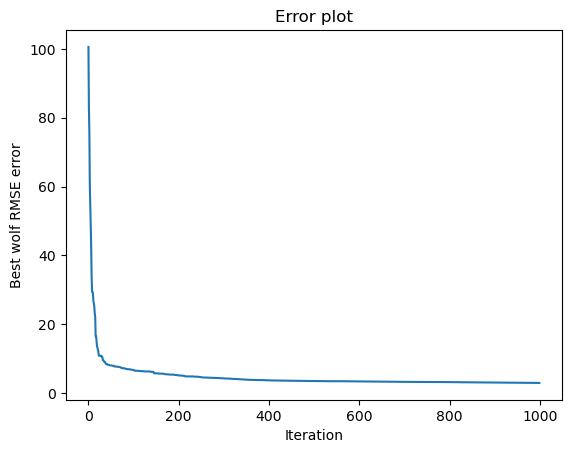

In [26]:
# graph of iteration errors

x_values = range(len(iteration_errors))
plt.plot(x_values, iteration_errors)
plt.xlabel('Iteration')
plt.ylabel('Best wolf RMSE error')
plt.title('Error plot')
plt.show()

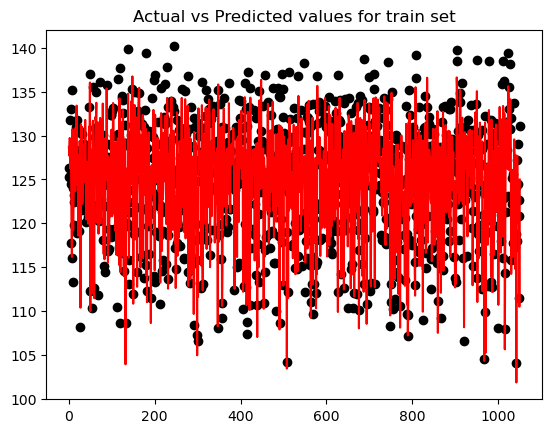

In [27]:
# scatter and line plot for train set

x_values = np.array([i for i in range(X_train.shape[0])])
plt.scatter(x_values, y_train, color = 'black', label = 'Actual values')
plt.plot(x_values, y_train_pred, color = 'red', label = 'Predicted values')
plt.title('Actual vs Predicted values for train set')
plt.show()

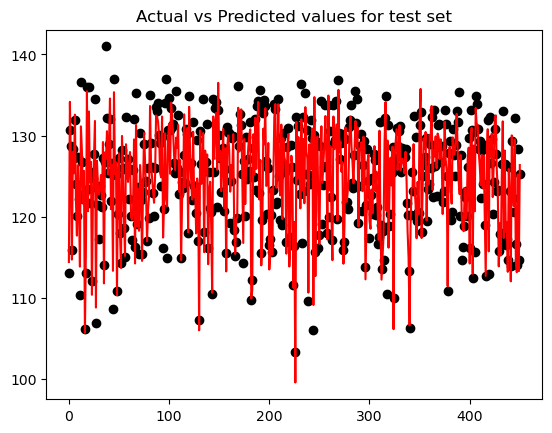

In [28]:
# scatter and line plot for test set

x_values = np.array([i for i in range(X_test.shape[0])])
plt.scatter(x_values, y_test, color = 'black', label = 'Actual values')
plt.plot(x_values, y_test_pred, color = 'red', label = 'Predicted values')
plt.title('Actual vs Predicted values for test set')
plt.show()